In [463]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

from sklearn import svm
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

from sklearn.decomposition import PCA
from scipy.stats import zscore

In [464]:
# read into pandas dataframe
mydata = pd.read_csv('vehicle.csv')

In [465]:
# Check first 5 records
mydata.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

In [466]:
# shape
print(mydata.shape)

(846, 19)


In [467]:
# To see the data type of each of the variable, number of values entered in each of the variables
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

There are signs of missing values from above info:
Total entries is 846 but there are features less than 846 data points.

In [468]:
# Check null values
mydata.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

There are null values at 14 features as predicted. This nulls needs to be replaced or dropped.

In [469]:
# the output results provide the five number summary of the data.
mydata.describe(include="all").transpose()

count unique  top freq     mean      std  min  \
compactness                   846    NaN  NaN  NaN  93.6785  8.23447   73   
circularity                   841    NaN  NaN  NaN  44.8288  6.15217   33   
distance_circularity          842    NaN  NaN  NaN  82.1105  15.7783   40   
radius_ratio                  840    NaN  NaN  NaN  168.888  33.5202  104   
pr.axis_aspect_ratio          844    NaN  NaN  NaN  61.6789  7.89146   47   
max.length_aspect_ratio       846    NaN  NaN  NaN  8.56738  4.60122    2   
scatter_ratio                 845    NaN  NaN  NaN  168.902  33.2148  112   
elongatedness                 845    NaN  NaN  NaN  40.9337  7.81619   26   
pr.axis_rectangularity        843    NaN  NaN  NaN  20.5824  2.59293   17   
max.length_rectangularity     846    NaN  NaN  NaN  147.999  14.5157  118   
scaled_variance               843    NaN  NaN  NaN  188.631   31.411  130   
scaled_variance.1             844    NaN  NaN  NaN  439.494  176.667  184   
scaled_radius_of_gyration     844    NaN  NaN  NaN   174.71  32.5848  109   
scaled_radius_of_gyration.1   842    NaN  NaN  NaN  72.4477  7.48619   59   
skewness_about                840    NaN  NaN  NaN  6.36429  4.92065    0   
skewness_about.1              845    NaN  NaN  NaN  12.6024  8.93608    0   
skewness_about.2              845    NaN  NaN  NaN   188.92  6.15581  176   
hollows_ratio                 846    NaN  NaN  NaN  195.632   7.4388  181   
class                         846      3  car  429      NaN      NaN  NaN   

                                25%    50%  75%   max  
compactness                      87     93  100   119  
circularity                      40     44   49    59  
distance_circularity             70     80   98   112  
radius_ratio                    141    167  195   333  
pr.axis_aspect_ratio             57     61   65   138  
max.length_aspect_ratio           7      8   10    55  
scatter_ratio                   147    157  198   265  
elongatedness                    33     43   46    61  
pr.axis_rectangularity           19     20   23    29  
max.length_rectangularity       137    146  159   188  
scaled_variance                 167    179  217   320  
scaled_variance.1               318  363.5  587  1018  
scaled_radius_of_gyration       149  173.5  198   268  
scaled_radius_of_gyration.1      67   71.5   75   135  
skewness_about                    2      6    9    22  
skewness_about.1                  5     11   19    41  
skewness_about.2                184    188  193   206  
hollows_ratio                190.25    197  201   211  
class                           NaN    NaN  NaN   NaN

Skewness can be noticed at following features: 
radius_ratio, pr.axis_aspect_ratio, max.length_aspect ratio, scaled_variance, scaled_variance.1, skewness_about and skewness_about1

In [470]:
# Rows containing duplicate data
duplicate_rows_df = mydata[mydata.duplicated()]
print("number of duplicate rows:", duplicate_rows_df.shape)

number of duplicate rows: (0, 19)


In [471]:
#Custom missing values check
missing_values = ["n/a", "na", "--",".","?","??"]
mydata = pd.read_csv("vehicle.csv", na_values = missing_values)

# Total missing values for each feature
print (mydata.isnull().sum())

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64


#### Dealing with missing values

In [472]:
# rename columns which has '.'
mydata.rename(columns = {'pr.axis_aspect_ratio':'pr_axis_ar' , 'max.length_aspect_ratio':'max.length_ar', 
                         'pr.axis_rectangularity':'pr_axis_rectangularity', 'max.length_rectangularity':'max_lr' , 
                         'scaled_variance.1':'scaled_variance_1' , 'scaled_radius_of_gyration.1':'scaled_radius_of_gyration_1' ,
                         'skewness_about.1':'skewness_about_1' , 'skewness_about.2':'skewness_about_2' , 'class':'CLASS' },
              inplace = True) 


we have renamed class to CLASS cause 'class' word is a keyword so needs to be renamed to process this feature.

In [473]:
mydata['circularity'].fillna(mydata.circularity.mean(), inplace = True) 
# Nulls of feature - 'circularity' is replaced by mean

mydata['distance_circularity'].fillna(mydata.distance_circularity.mean(), inplace = True)
# Nulls of feature - 'distance_circularity' is replaced by mean

mydata['radius_ratio'].fillna(mydata.radius_ratio.median(), inplace = True)
# Nulls of feature - 'radius_ratio' is replaced by median

mydata['pr_axis_ar'].fillna(mydata.pr_axis_ar.median(), inplace = True)
# Nulls of feature - 'pr_axis_ar' is replaced by median

mydata['scatter_ratio'].fillna(mydata.scatter_ratio.mean(), inplace = True)
# Nulls of feature - 'scatter_ratio' is replaced by mean

mydata['elongatedness'].fillna(mydata.elongatedness.mean(), inplace = True)
# Nulls of feature - 'elongatedness' is replaced by mean

mydata['pr_axis_rectangularity'].fillna(mydata.pr_axis_rectangularity.mean(), inplace = True)
# Nulls of feature - 'pr_axis_rectangularity' is replaced by mean

mydata['scaled_variance'].fillna(mydata.scaled_variance.median(), inplace = True)
# Nulls of feature - 'scaled_variance' is replaced by median

mydata['scaled_variance_1'].fillna(mydata.scaled_variance_1.median(), inplace = True)
# Nulls of feature - 'scaled_variance_1' is replaced by median

mydata['scaled_radius_of_gyration'].fillna(mydata.scaled_radius_of_gyration.mean(), inplace = True)
# Nulls of feature - 'scaled_radius_of_gyration' is replaced by mean

mydata['scaled_radius_of_gyration_1'].fillna(mydata.scaled_radius_of_gyration_1.mean(), inplace = True)
# Nulls of feature - 'scaled_radius_of_gyration_1 is replaced by mean

mydata['skewness_about'].fillna(mydata.skewness_about.median(), inplace = True)
# Nulls of feature - 'skewness_about' is replaced by median

mydata['skewness_about_1'].fillna(mydata.skewness_about_1.median(), inplace = True)
# Nulls of feature - 'skewness_about_1' is replaced by median

mydata['skewness_about_2'].fillna(mydata.skewness_about_2.mean(), inplace = True)
# Nulls of feature - 'skewness_about_2' is replaced by mean

**We have used median on few features to remove null values because outliers affects the mean**

In [474]:
# number of missing values (only the ones recognised as missing values) in each of the attributes
pd.DataFrame( mydata.isnull().sum(), columns= ['Number of missing values'])

Number of missing values
compactness                                         0
circularity                                         0
distance_circularity                                0
radius_ratio                                        0
pr_axis_ar                                          0
max.length_ar                                       0
scatter_ratio                                       0
elongatedness                                       0
pr_axis_rectangularity                              0
max_lr                                              0
scaled_variance                                     0
scaled_variance_1                                   0
scaled_radius_of_gyration                           0
scaled_radius_of_gyration_1                         0
skewness_about                                      0
skewness_about_1                                    0
skewness_about_2                                    0
hollows_ratio                                       0
CLASS                                               0

We have removed all null values by either mean or median as per outliers

#### Deal with outliers

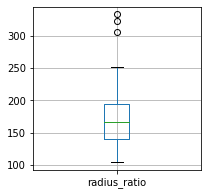

In [475]:
# Create boxplot for column="radius_ratio"

mydata.boxplot(column="radius_ratio",return_type='axes',figsize=(3,3))

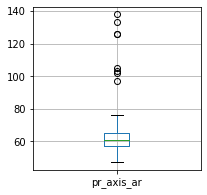

In [476]:
# Create boxplot for column="pr_axis_ar'"

mydata.boxplot(column="pr_axis_ar",return_type='axes',figsize=(3,3))

these two features above are examples for outliers which was predicted earlier

In [477]:
# Outliers using statistical rules

Q1 = mydata.quantile(0.25)
Q3 = mydata.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

compactness                     13.00
circularity                      9.00
distance_circularity            28.00
radius_ratio                    54.00
pr_axis_ar                       8.00
max.length_ar                    3.00
scatter_ratio                   51.00
elongatedness                   13.00
pr_axis_rectangularity           4.00
max_lr                          22.00
scaled_variance                 50.00
scaled_variance_1              268.50
scaled_radius_of_gyration       49.00
scaled_radius_of_gyration_1      8.00
skewness_about                   7.00
skewness_about_1                14.00
skewness_about_2                 9.00
hollows_ratio                   10.75
dtype: float64


In [478]:
np.where((mydata < (Q1 - 1.5 * IQR)) | (mydata > (Q3 + 1.5 * IQR))) # data points with outliers

(array([  4,   4,   4,  37,  37,  37,  37,  44,  47,  79,  85, 100, 100,
        100, 113, 123, 127, 132, 135, 135, 135, 135, 190, 230, 291, 291,
        291, 346, 381, 388, 388, 388, 388, 388, 391, 400, 498, 505, 516,
        523, 523, 523, 544, 623, 655, 655, 706, 706, 706, 761, 796, 797,
        815, 815, 835], dtype=int64),
 array([ 6,  8, 12,  6,  8, 10, 12, 16, 12, 12, 14,  6,  8, 12, 16, 16,  6,
        17,  6,  8, 10, 12, 16, 12,  6,  8, 12, 16, 12,  6,  8, 10, 12, 13,
         6, 16, 12, 16, 16,  6,  8, 12,  6, 16,  6, 12,  6,  8, 12, 16, 16,
        16,  6, 12, 14], dtype=int64))

In [480]:
mydata_out = mydata[~((mydata < (Q1 - 1.5 * IQR)) |(mydata > (Q3 + 1.5 * IQR))).any(axis=1)] # total rows without outliers
mydata_out.shape

#23 records can be removed or corrected but can lead to new set of outliers

(813, 19)

In [481]:
mydata_copy = mydata.copy()

# Replace every outlier on the lower side by the lower whisker
for i, j in zip(np.where(mydata_copy < Q1 - 1.5 * IQR)[0], np.where(mydata_copy < Q1 - 1.5 * IQR)[1]): 
    
    whisker  = Q1 - 1.5 * IQR
    mydata_copy.iloc[i,j] = whisker[j]
    
    
#Replace every outlier on the upper side by the upper whisker    
for i, j in zip(np.where(mydata_copy > Q3 + 1.5 * IQR)[0], np.where(mydata_copy > Q3 + 1.5 * IQR)[1]):
    
    whisker  = Q3 + 1.5 * IQR
    mydata_copy.iloc[i,j] = whisker[j]

In [482]:
mydata_copy.shape, mydata.shape

((846, 19), (846, 19))

Outliers has been dealt with using IQR rule.

In [483]:
np.where((mydata_copy < (Q1 - 1.5 * IQR)) | (mydata_copy > (Q3 + 1.5 * IQR))) # rows with outliers after using IQR technique

(array([  4,   4,   4,  37,  37,  37,  37,  44,  47,  79,  85, 100, 100,
        100, 113, 123, 127, 132, 135, 135, 135, 135, 190, 230, 291, 291,
        291, 346, 381, 388, 388, 388, 391, 400, 498, 505, 516, 523, 523,
        523, 544, 623, 655, 655, 706, 706, 706, 761, 796, 797, 815, 815,
        835], dtype=int64),
 array([ 6,  8, 12,  6,  8, 10, 12, 16, 12, 12, 14,  6,  8, 12, 16, 16,  6,
        17,  6,  8, 10, 12, 16, 12,  6,  8, 12, 16, 12,  6,  8, 10,  6, 16,
        12, 16, 16,  6,  8, 12,  6, 16,  6, 12,  6,  8, 12, 16, 16, 16,  6,
        12, 14], dtype=int64))

We can see slight reduction in outliers. we can also expect outliers to remain but we can ignore them. we can further reduce to fewer outliers if we change the multiplier to a lesser value (ie.. lesser than 1.5 times of IQR)

## Understand attributes and relationships


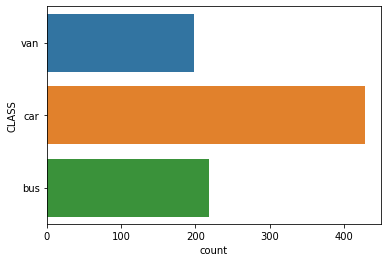

In [484]:
#Using Countplot to count number of different CLASS in the dataset

sns.countplot(y=mydata_copy.CLASS)
plt.show()

In [485]:
# we are re-representing our target feature - CLASS to numeric

labelencoder = LabelEncoder()  
mydata_copy['CLASS'] = labelencoder.fit_transform(mydata_copy.CLASS) # returns label encoded variable(s)

In [486]:
mydata_copy.CLASS = mydata_copy.CLASS.astype('int') # Convert data type to category for feature = class

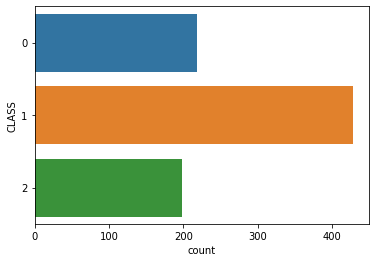

In [487]:
#Using Countplot to count number of different CLASS in the dataset

sns.countplot(y=mydata_copy.CLASS)
plt.show()

Car has the most data points

0 -> Bus
1 -> Car
2 -> Van

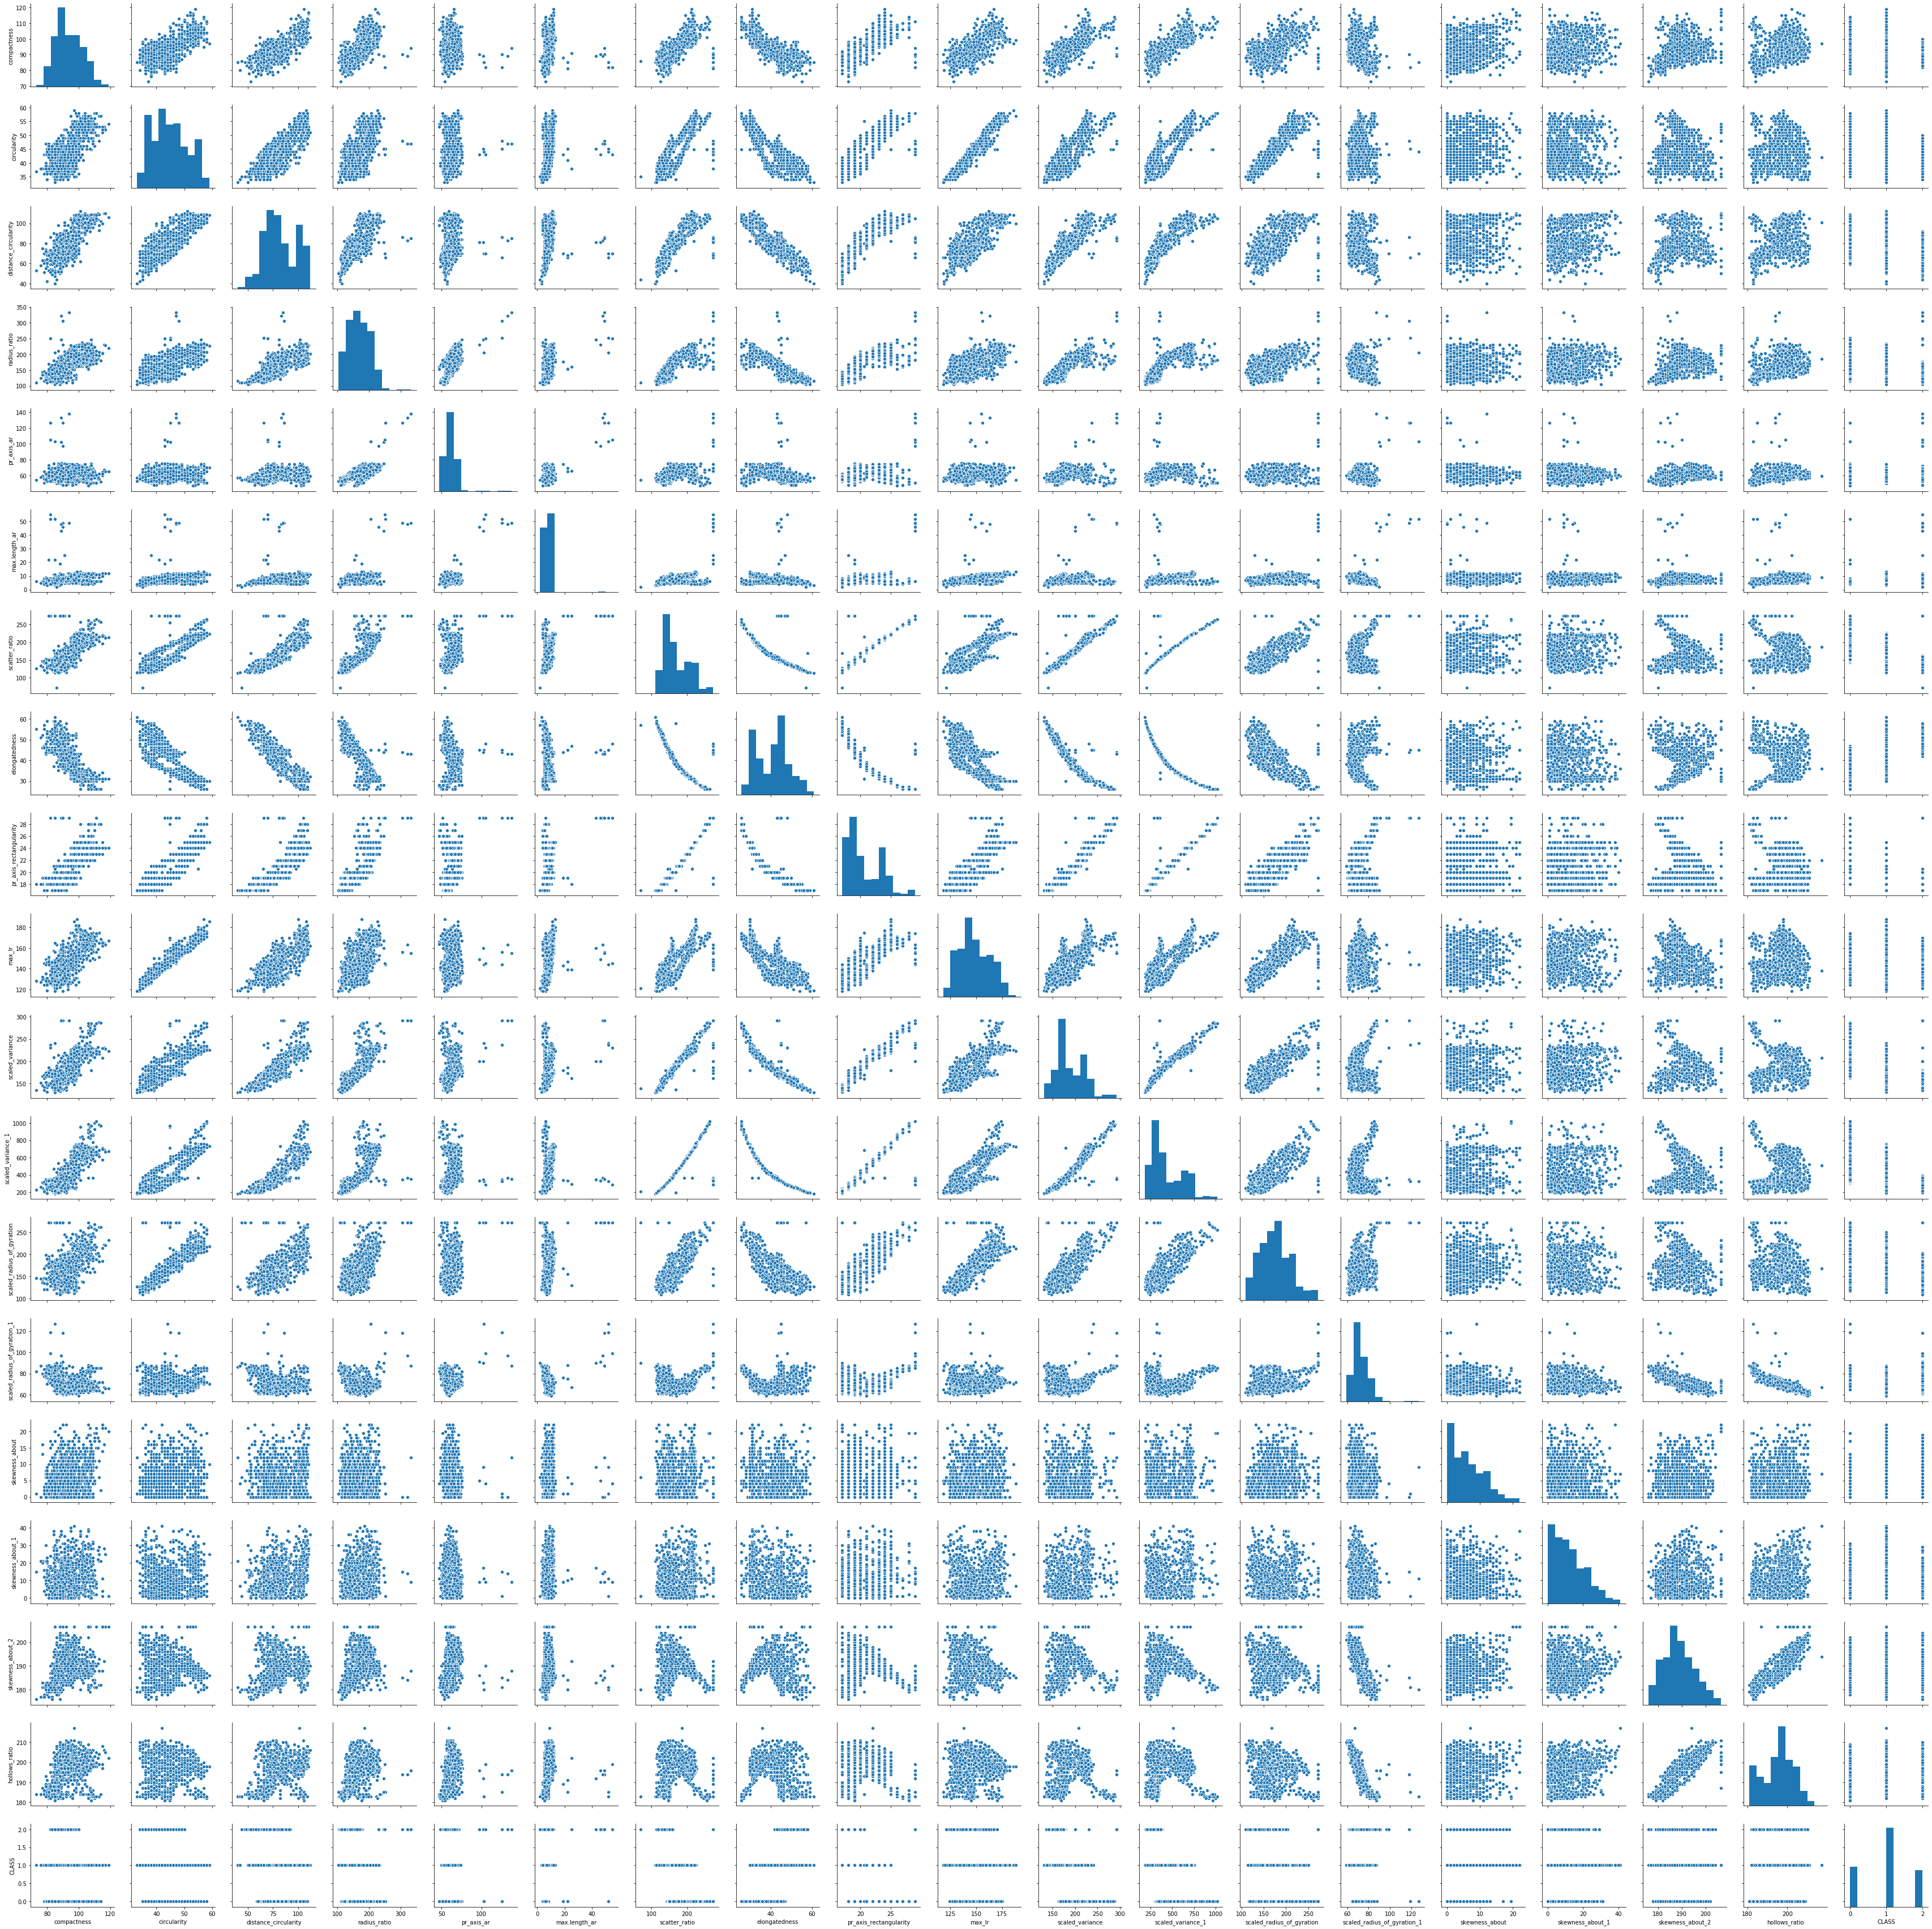

In [488]:
sns.pairplot(mydata_copy)

Here we can see few features are having postive and negative(10 features) linear relationships so that we can reduce the dimensions using PCA later. We can see these relations through correlations matrix as well which is below.

We can see the outliers on the diagonal graphs as well. And few features which are not in noramal distributions can be noticed.

compactness  circularity  distance_circularity  \
compactness                     1.000000     0.685421              0.789909   
circularity                     0.685421     1.000000              0.793016   
distance_circularity            0.789909     0.793016              1.000000   
radius_ratio                    0.689743     0.620709              0.766780   
pr_axis_ar                      0.091534     0.153089              0.158287   
max.length_ar                   0.148249     0.251208              0.264550   
scatter_ratio                   0.721191     0.788958              0.825377   
elongatedness                  -0.788643    -0.821901             -0.911435   
pr_axis_rectangularity          0.751612     0.809472              0.843371   
max_lr                          0.676143     0.961943              0.774669   
scaled_variance                 0.757513     0.794972              0.858465   
scaled_variance_1               0.814012     0.836984              0.886040   
scaled_radius_of_gyration       0.508590     0.846855              0.616493   
scaled_radius_of_gyration_1    -0.260826     0.052036             -0.236740   
skewness_about                  0.246962     0.156705              0.122495   
skewness_about_1                0.157015    -0.011851              0.265266   
skewness_about_2                0.318670    -0.092557              0.149070   
hollows_ratio                   0.364886     0.044334              0.332960   
CLASS                          -0.033796    -0.159804             -0.064902   

                             radius_ratio  pr_axis_ar  max.length_ar  \
compactness                      0.689743    0.091534       0.148249   
circularity                      0.620709    0.153089       0.251208   
distance_circularity             0.766780    0.158287       0.264550   
radius_ratio                     1.000000    0.663447       0.450052   
pr_axis_ar                       0.663447    1.000000       0.648724   
max.length_ar                    0.450052    0.648724       1.000000   
scatter_ratio                    0.782275    0.339735       0.499327   
elongatedness                   -0.789515   -0.183055      -0.180041   
pr_axis_rectangularity           0.778399    0.313869       0.460811   
max_lr                           0.568949    0.126909       0.305943   
scaled_variance                  0.799236    0.289270       0.335426   
scaled_variance_1                0.718436    0.089189       0.143253   
scaled_radius_of_gyration        0.540439    0.266326       0.382815   
scaled_radius_of_gyration_1     -0.227308    0.082388       0.238292   
skewness_about                   0.050726   -0.066332       0.012000   
skewness_about_1                 0.173741   -0.031976       0.043422   
skewness_about_2                 0.376132    0.227860      -0.019246   
hollows_ratio                    0.470437    0.266118       0.143542   
CLASS                           -0.182186   -0.098178       0.207619   

                             scatter_ratio  elongatedness  \
compactness                       0.721191      -0.788643   
circularity                       0.788958      -0.821901   
distance_circularity              0.825377      -0.911435   
radius_ratio                      0.782275      -0.789515   
pr_axis_ar                        0.339735      -0.183055   
max.length_ar                     0.499327      -0.180041   
scatter_ratio                     1.000000      -0.885739   
elongatedness                    -0.885739       1.000000   
pr_axis_rectangularity            0.957543      -0.890218   
max_lr                            0.760296      -0.775519   
scaled_variance                   0.939270      -0.932347   
scaled_variance_1                 0.899647      -0.953765   
scaled_radius_of_gyration         0.751251      -0.673029   
scaled_radius_of_gyration_1       0.124864       0.105707   
skewness_about                    0.064895      -0.063738   
skewness_about_1               

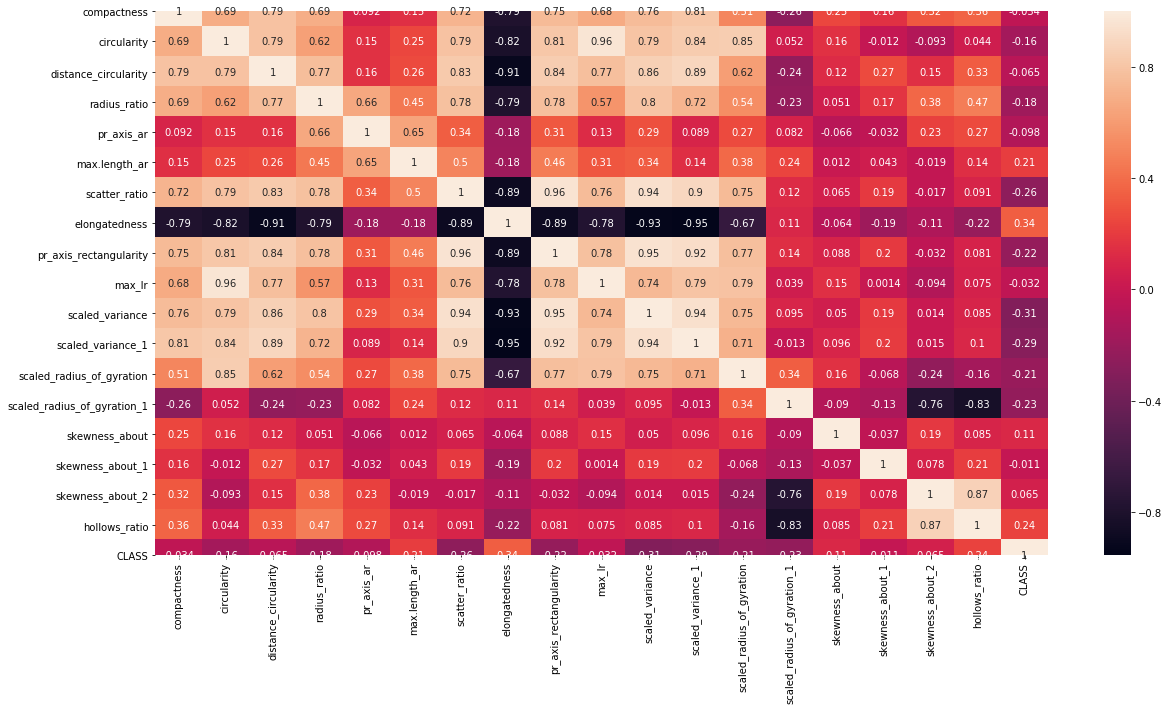

In [489]:
# Correlation and heatmap for the same

plt.figure(figsize=(20,10))
c= mydata_copy.corr()
sns.heatmap(c,annot=True)
c

We can notice that features(assumed independent variables) are not having any relationships to predict a CLASS(dependent/target variable)   

Highest +ve correlation wrt to CLASS = elongatedness (0.33)
Highest -ve correlation wrt to CLASS = scaled_variance (-0.30)

We can use all independent features for our SVM model

###   Splitting and Standardizing data

In [490]:
#Splitting data into 70:30

X = mydata_copy.drop('CLASS',axis=1)     # all independent variables
Y = mydata_copy['CLASS']   # seperating dependent variable (values = 0,1,2)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
# 1 is just any random seed number

x_train.head()

compactness  circularity  distance_circularity  radius_ratio  pr_axis_ar  \
350           97         46.0                 101.0         210.0        66.0   
40            95         48.0                 104.0         214.0        67.0   
89            80         37.0                  57.0         116.0        55.0   
427           86         38.0                  89.0         176.0        59.0   
353           81         47.0                  69.0         146.0        64.0   

     max.length_ar  scatter_ratio  elongatedness  pr_axis_rectangularity  \
350              8          192.0           35.0                    22.0   
40               9          205.0           32.0                    23.0   
89               6          125.0           54.0                    18.0   
427              9          169.0           39.0                    20.0   
353              6          151.0           44.0                    19.0   

     max_lr  scaled_variance  scaled_variance_1  scaled_radius_of_gyration  \
350     151            208.0              546.0                      169.0   
40      151            227.0              628.0                      202.0   
89      125            142.0              229.0                      132.0   
427     132            190.0              428.0                      148.0   
353     147            171.0              340.0                      195.0   

     scaled_radius_of_gyration_1  skewness_about  skewness_about_1  \
350                         66.0             1.0              32.0   
40                          74.0             5.0               9.0   
89                          81.0             8.0               5.0   
427                         67.0             7.0              33.0   
353                         75.0             5.0               0.0   

     skewness_about_2  hollows_ratio  
350             191.0          200.0  
40              186.0          193.0  
89              178.0          184.0  
427             193.0          202.0  
353             183.0          188.0

In [491]:
#Use Standard scale on all columns and then we will predict

sc_x = StandardScaler() 
sc_X = sc_x.fit_transform(X) # we need this for KFold
sc_x_train = sc_x.fit_transform(x_train)  
sc_x_test = sc_x.transform(x_test) 

### SVM

In [492]:
svm_model = svm.SVC(kernel='linear' , gamma='auto')    #kernel = 'linear'/'poly'/'rbf'/'sigmoid'

In [493]:
svm_model.fit(sc_x_train , y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [494]:
y_pred = svm_model.predict(sc_x_test)

In [495]:
confusion_matrix(y_test , y_pred)   # Calling getAccuracy function instead of usinig array comparison to get the %age accuracy

array([[ 56,   2,   1],
       [  2, 129,   2],
       [  1,   2,  59]], dtype=int64)

In [496]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred, digits=3)) # digits parameter too handle multiclass

Accuracy: 0.9606299212598425
              precision    recall  f1-score   support

           0      0.949     0.949     0.949        59
           1      0.970     0.970     0.970       133
           2      0.952     0.952     0.952        62

    accuracy                          0.961       254
   macro avg      0.957     0.957     0.957       254
weighted avg      0.961     0.961     0.961       254



After trying out various combinations of kernel and gamma values, I have found that kernel = 'linear' and gamma = 'auto' gives us the highest accuracy. Also other parameters such as precision,recall and f1-score is highest for the above combination.

Accuracy = 96.06%

#### K-Fold cross validation

In [497]:
num_folds = 50
seed = 7

kfold = KFold(n_splits=num_folds, random_state=seed)
model = svm.SVC(kernel='poly' , gamma='auto')
results = cross_val_score(model, sc_X, Y, cv=kfold)

#get the mean of each fold 
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 82.882% (9.482%)


In [498]:
num_folds = 30
seed = 7

kfold = KFold(n_splits=num_folds, random_state=seed)
model = svm.SVC(kernel='poly' , gamma='auto')
results = cross_val_score(model, sc_X, Y, cv=kfold)

#get the mean of each fold 
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 82.923% (8.590%)


In [499]:
num_folds = 40
seed = 7

kfold = KFold(n_splits=num_folds, random_state=seed)
model = svm.SVC(kernel='poly' , gamma='auto') #kernel = 'linear'/'poly'/'rbf'/'sigmoid'
results = cross_val_score(model, sc_X, Y, cv=kfold)
print(results) 

#get the mean accuracy of each fold 
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

results_prec = cross_val_score(model, sc_X, Y, cv=kfold, scoring='precision_macro')
results_rec = cross_val_score(model, sc_X, Y, cv=kfold, scoring='recall_macro')
results_f1 = cross_val_score(model, sc_X, Y, cv=kfold, scoring='f1_macro')

#get the mean precison of each fold 
print("Precison: %.3f%% (%.3f%%)" % (results_prec.mean()*100.0, results_prec.std()*100.0))
#get the mean recall of each fold 
print("Recall: %.3f%% (%.3f%%)" % (results_rec.mean()*100.0, results_rec.std()*100.0))
#get the mean f1 score of each fold 
print("F1 Score: %.3f%% (%.3f%%)" % (results_f1.mean()*100.0, results_f1.std()*100.0))

[0.68181818 0.77272727 0.86363636 0.86363636 0.77272727 0.45454545
 0.71428571 0.85714286 0.76190476 0.85714286 0.9047619  0.85714286
 0.95238095 0.71428571 0.85714286 0.76190476 0.9047619  0.76190476
 0.71428571 0.71428571 0.95238095 0.9047619  0.85714286 0.80952381
 0.95238095 0.85714286 0.95238095 0.95238095 0.85714286 0.9047619
 0.80952381 0.80952381 0.71428571 1.         0.80952381 0.85714286
 0.9047619  0.76190476 0.95238095 0.9047619 ]
Accuracy: 83.166% (10.210%)


E:\Anaconda3.7\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
E:\Anaconda3.7\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Precison: 88.024% (9.532%)
Recall: 78.479% (11.595%)
F1 Score: 80.105% (11.459%)


Accuracy is highest when number of folds is set to 40.

Accuracy score can vary between 72.95% and 93.37%

**We can try with stratified kfold as well cause it usually performs better than normal kfold**

In [500]:
k=50
stratified_model=StratifiedKFold(n_splits=k,random_state=7)
model = svm.SVC(kernel='poly' , gamma='auto') #kernel = 'linear'/'poly'/'rbf'/'sigmoid'
results=cross_val_score(model ,sc_X,Y,cv=stratified_model)
print('Average Accuracy:',results.mean())
print('STD',results.std())

Average Accuracy: 0.8347696078431371
STD 0.09639532613647249


In [501]:
results_prec = cross_val_score(model, sc_X, Y, cv=kfold, scoring='precision_macro')
results_rec = cross_val_score(model, sc_X, Y, cv=kfold, scoring='recall_macro')
results_f1 = cross_val_score(model, sc_X, Y, cv=kfold, scoring='f1_macro')

#get the mean precison of each fold 
print("Precison: %.3f%% (%.3f%%)" % (results_prec.mean()*100.0, results_prec.std()*100.0))
#get the mean recall of each fold 
print("Recall: %.3f%% (%.3f%%)" % (results_rec.mean()*100.0, results_rec.std()*100.0))
#get the mean f1 score of each fold 
print("F1 Score: %.3f%% (%.3f%%)" % (results_f1.mean()*100.0, results_f1.std()*100.0))

E:\Anaconda3.7\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
E:\Anaconda3.7\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Precison: 88.024% (9.532%)
Recall: 78.479% (11.595%)
F1 Score: 80.105% (11.459%)


StratifiedKFold has shown higher accuracy than normal kfold. 

Have tried with different values for kernels of svm and k to find out -> kernel=poly and k=50 gives the best accuracy

### PCA

In [502]:
# we have already scaled the data and it will be used again
print(sc_X)

[[ 0.16058035  0.51730193  0.05654535 ...  0.3808703  -0.32659822
   0.18150217]
 [-0.32546965 -0.62456401  0.12011169 ...  0.15679779 -0.01560823
   0.44950842]
 [ 1.25419283  0.84354934  1.51857115 ... -0.40338349 -0.17110323
   0.04749904]
 ...
 [ 1.49721783  1.49604417  1.20073946 ... -0.96356477 -0.32659822
   0.71751468]
 [-0.93303214 -1.44018254 -0.26128634 ...  1.38919659  0.13988677
  -0.08650409]
 [-1.05454464 -1.44018254 -1.02408241 ...  0.60494281 -0.48209322
  -0.75651972]]


[[ 1.00118343  0.68623251  0.79084412  0.69055952  0.09164265  0.14842463
   0.72204436 -0.78957587  0.75250115  0.67694334  0.75840926  0.81497566
   0.50919188 -0.26113438  0.24725402  0.15720044  0.31904756  0.36531778]
 [ 0.68623251  1.00118343  0.79395399  0.62144343  0.15327011  0.25150523
   0.78989142 -0.82287347  0.81042987  0.96308094  0.79591312  0.8379745
   0.84785753  0.05209772  0.15689041 -0.01186505 -0.09266696  0.04438663]
 [ 0.79084412  0.79395399  1.00118343  0.76768725  0.15847439  0.26486339
   0.82635354 -0.91251368  0.84436893  0.77558624  0.8594812   0.8870887
   0.61722222 -0.23702056  0.12264026  0.26558039  0.14924685  0.33335425]
 [ 0.69055952  0.62144343  0.76768725  1.00118343  0.66423242  0.45058426
   0.78320058 -0.79044947  0.77931986  0.56962256  0.80018171  0.71928618
   0.54107819 -0.22757657  0.0507862   0.17394649  0.37657683  0.47099406]
 [ 0.09164265  0.15327011  0.15847439  0.66423242  1.00118343  0.64949139
   0.34013719 -0.18327197  0.3142404

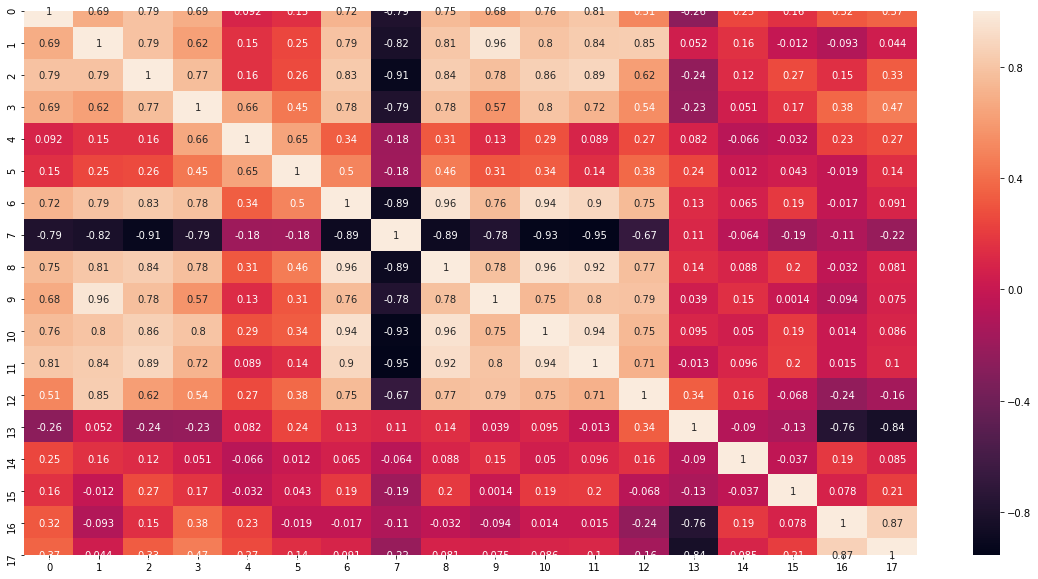

In [503]:
covMatrix = np.cov(sc_X,rowvar=False)
print(covMatrix)

plt.figure(figsize=(20,10))
sns.heatmap(covMatrix,annot=True)

Covariance matrix is closely related to correlation matrix, which helps us identifying the relationships between the features.

Here from heatmap, I have noticed that this is similar to the heatmap as before

In [504]:
pca = PCA(n_components=18) # we are passing all 18 compenents (independent features without our target)
pca.fit(sc_X)

PCA(copy=True, iterated_power='auto', n_components=18, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [505]:
print(pca.explained_variance_) # sorted eigen values which helps us explain the variance of each component

[9.2695659  3.10308588 1.82468637 1.18606876 0.90393969 0.53202722
 0.36626845 0.23487326 0.18797504 0.12473008 0.07550102 0.05585427
 0.04456645 0.0329195  0.02502453 0.02459092 0.01991612 0.00970831]


In [506]:
print(pca.components_) # eigen vectors for all 18 components, hard to visualize with dimensions more than 3

[[ 2.70623422e-01  2.91508612e-01  3.01292905e-01  2.78068894e-01
   1.08092864e-01  1.32072624e-01  3.11336052e-01 -3.10090903e-01
   3.15265744e-01  2.81806310e-01  3.13512374e-01  3.09125318e-01
   2.59535868e-01 -8.41900144e-03  4.39809746e-02  5.70857171e-02
   3.04341616e-02  7.25766526e-02]
 [-1.45658807e-01  1.07206832e-01 -8.80887101e-02 -1.77233477e-01
  -7.86782770e-02  5.31290305e-02  7.05880963e-02  2.72968875e-02
   7.84744511e-02  9.88939320e-02  5.54128640e-02  3.36795014e-02
   2.32724655e-01  5.15840650e-01 -7.15266249e-02 -1.25165123e-01
  -5.23873348e-01 -5.27026547e-01]
 [-1.80867374e-01 -1.21085884e-01 -1.23234792e-01  2.38268575e-01
   6.42164742e-01  5.69051279e-01  7.46209646e-02  1.28761288e-01
   4.11134513e-02 -1.11976042e-01 -9.03509889e-03 -1.87718571e-01
   4.01434644e-02  1.79867751e-01 -1.53576259e-01 -6.36636410e-02
   5.76332818e-02  8.86043516e-02]
 [ 7.17773476e-02  1.76810594e-01 -8.57091122e-02 -3.53008030e-02
   6.14514804e-02  5.08846348e-02 -8.

In [507]:
print(pca.explained_variance_ratio_) # this is percentage variance of each component as calculated before

[0.51436716 0.17218989 0.10125164 0.06581482 0.05015951 0.02952213
 0.0203242  0.01303309 0.01043071 0.00692126 0.00418954 0.00309935
 0.00247299 0.0018267  0.00138861 0.00136455 0.00110514 0.00053871]


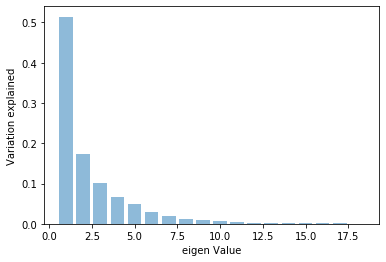

In [508]:
plt.bar(list(range(1,19)),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

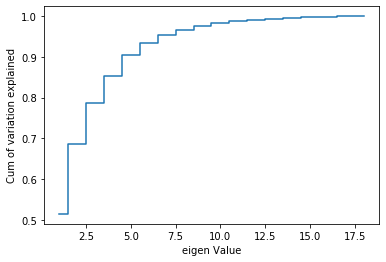

In [509]:
plt.step(list(range(1,19)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

**we are asked to capture components with 95% variance -> we can notice that at 8th eigen value, variance is 95%**

## Dimensionality reduced and re evaluate splits, models with PCA

In [510]:
data_reduced= PCA(n_components=8) # reduced features to 8
data_reduced.fit(sc_X)
print(data_reduced.components_)
print(data_reduced.explained_variance_ratio_)
Xdata_reduced = data_reduced.transform(sc_X)

[[ 0.27062342  0.29150861  0.30129291  0.27806889  0.10809286  0.13207262
   0.31133605 -0.3100909   0.31526574  0.28180631  0.31351237  0.30912532
   0.25953587 -0.008419    0.04398097  0.05708572  0.03043416  0.07257665]
 [-0.14565881  0.10720683 -0.08808871 -0.17723348 -0.07867828  0.05312903
   0.0705881   0.02729689  0.07847445  0.09889393  0.05541286  0.0336795
   0.23272465  0.51584065 -0.07152662 -0.12516512 -0.52387335 -0.52702655]
 [-0.18086737 -0.12108588 -0.12323479  0.23826857  0.64216474  0.56905128
   0.07462096  0.12876129  0.04111345 -0.11197604 -0.0090351  -0.18771857
   0.04014346  0.17986775 -0.15357626 -0.06366364  0.05763328  0.08860435]
 [ 0.07177735  0.17681059 -0.08570911 -0.0353008   0.06145148  0.05088463
  -0.08873061  0.09047364 -0.07818371  0.17413552 -0.114201   -0.09387579
   0.20424104 -0.03694465  0.59847129 -0.67230887  0.14294331  0.02449682]
 [ 0.04089953 -0.11936854  0.00160068 -0.06760263 -0.038626    0.21573499
   0.05130127  0.10289473  0.063414

In [511]:
Xdata_reduced

array([[ 0.33665315, -0.18725083,  0.89139145, ..., -0.77227007,
        -1.03076192,  0.074751  ],
       [-1.61137205, -0.43294731, -0.33374472, ..., -0.55175508,
         0.35871967, -0.23242026],
       [ 3.67016657,  0.15013392, -0.18161793, ...,  0.63526766,
        -0.09557   , -0.54031614],
       ...,
       [ 4.71374472, -0.02723307,  0.30617311, ..., -0.22390383,
         0.485385  , -0.27869016],
       [-3.30379317, -0.98661296,  0.04487325, ..., -0.33302813,
        -0.10811427, -0.12334552],
       [-4.7552438 ,  0.33184351, -0.32827605, ..., -0.28064756,
         0.0610534 ,  0.21236509]])

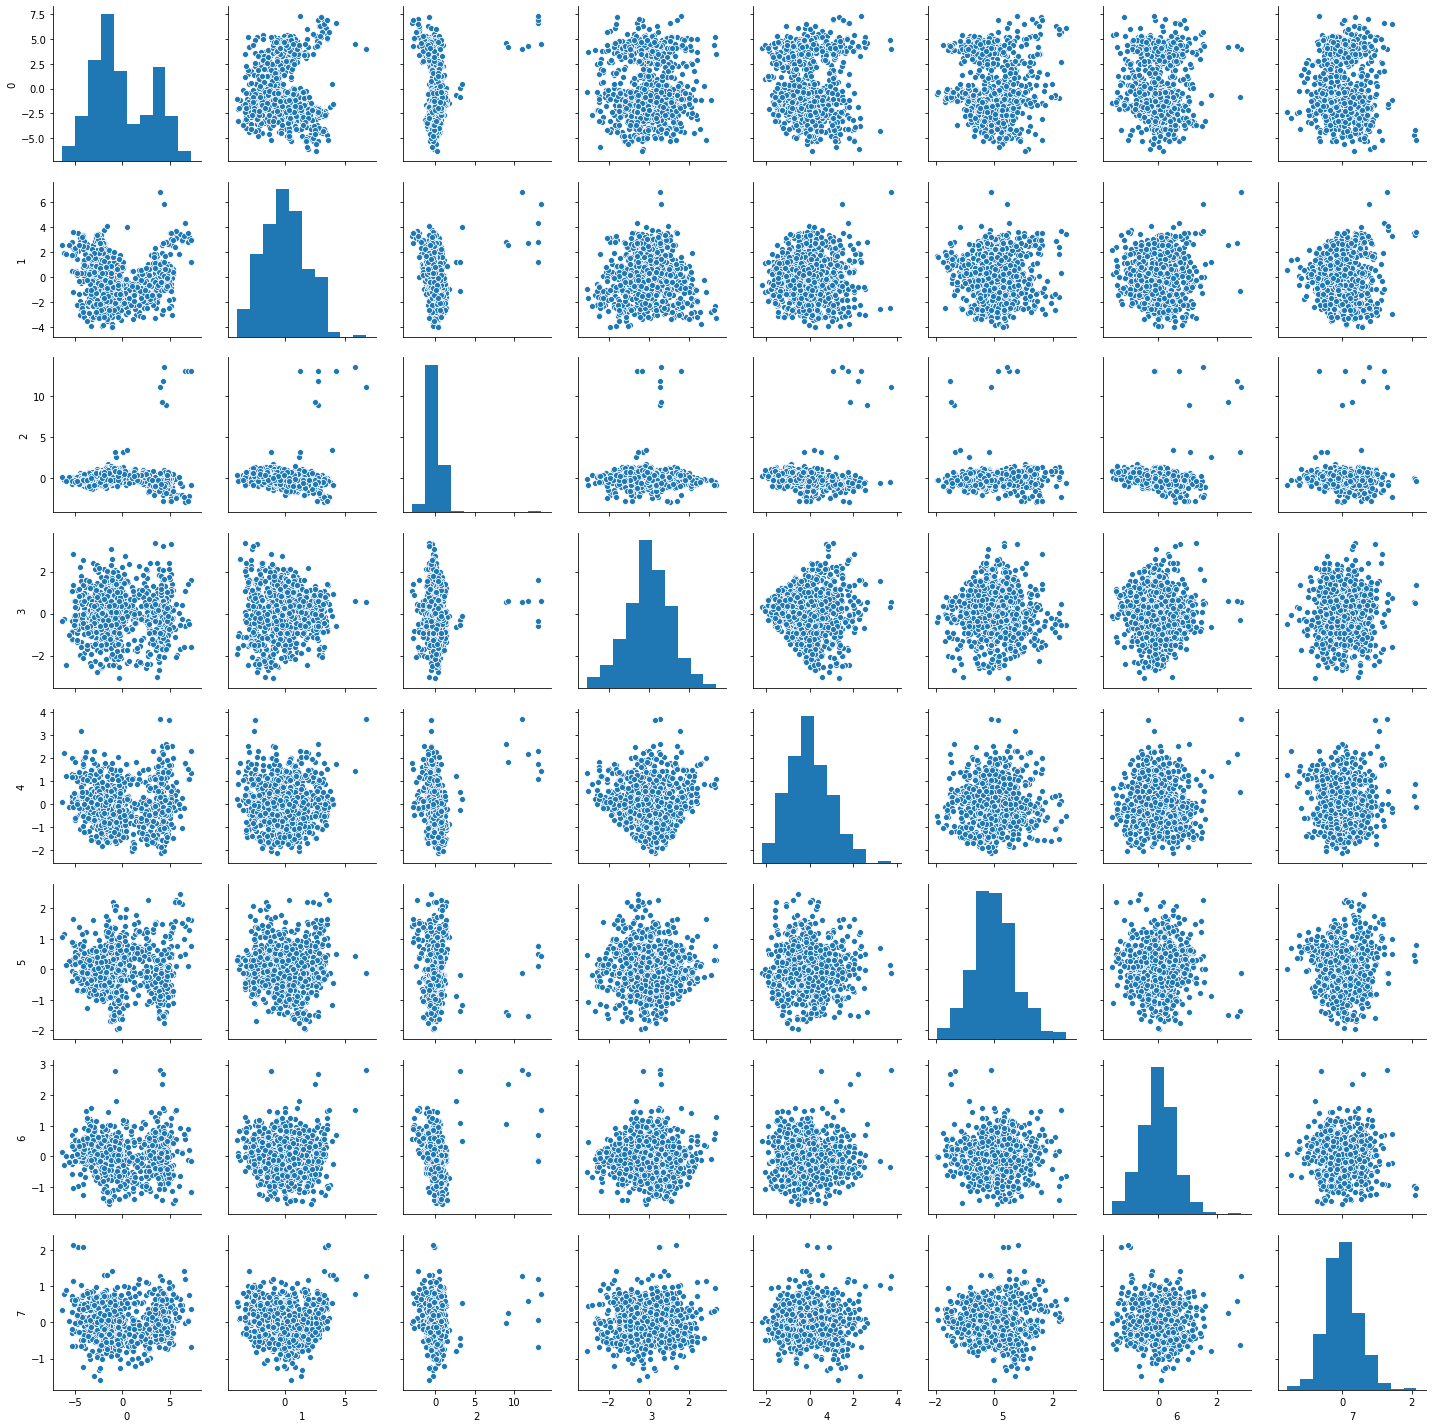

In [512]:
sns.pairplot(pd.DataFrame(Xdata_reduced))

We can see that relationships of components have changed to independent from dependent
(dependence in features was seen in earlier pairplot) 

Also distributions of data points are closer to binomial.

### Split with PCA

In [513]:
#Splitting data into 70:30

X = Xdata_reduced   # all 8 PCA independent variables
Y = mydata_copy['CLASS']   # seperating dependent variable (values = 0,1,2) which was earlier defined as well

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
# 1 is just any random seed number

Y.shape

(846,)

### SVM with PCA

In [514]:
svm_model = svm.SVC(kernel='rbf' , gamma='auto')    #kernel = 'linear'/'poly'/'rbf'/'sigmoid'

In [515]:
svm_model.fit(x_train , y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [516]:
y_pred = svm_model.predict(x_test)

In [517]:
confusion_matrix(y_test , y_pred)   # Calling getAccuracy function instead of usinig array comparison to get the %age accuracy

array([[ 57,   1,   1],
       [  3, 125,   5],
       [  2,   7,  53]], dtype=int64)

In [518]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred, digits=3))

Accuracy: 0.9251968503937008
              precision    recall  f1-score   support

           0      0.919     0.966     0.942        59
           1      0.940     0.940     0.940       133
           2      0.898     0.855     0.876        62

    accuracy                          0.925       254
   macro avg      0.919     0.920     0.919       254
weighted avg      0.925     0.925     0.925       254



**Have tried for various kernel values and have found that RBF perfomed the best.**

**There is a slight drop in accuracy and is expected because there is slight loss of information after PCA of approx=5%**

### Cross validation with PCA

In [519]:
num_folds = 50
seed = 7

kfold = KFold(n_splits=num_folds, random_state=seed)
model = svm.SVC(kernel='rbf' , gamma='auto') #kernel = 'linear'/'poly'/'rbf'/'sigmoid'
results = cross_val_score(model, X, Y, cv=kfold)

#get the mean of each fold 
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 94.574% (4.830%)


**Cross validation performed with 94.57% Accuracy with 4.83% STD**

In [520]:
num_folds = 60
seed = 7

kfold = KFold(n_splits=num_folds, random_state=seed)
model = svm.SVC(kernel='rbf' , gamma='auto')
results = cross_val_score(model, X, Y, cv=kfold)

#get the mean of accuracy for each fold 
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 94.452% (5.516%)


**Cross validation performed with 94.45% Accuracy with 3.91% STD**

Have tried for various kernels,num_folds and have found rbf with folds=50 again to be the best


#### Stratified KFold with PCA

In [522]:
k=60

stratified_model=StratifiedKFold(n_splits=k,random_state=7)
model = svm.SVC(kernel='rbf' , gamma='auto') #kernel = 'linear'/'poly'/'rbf'/'sigmoid'
results_acc=cross_val_score(model ,X,Y,cv=stratified_model)
results_prec=cross_val_score(model ,X,Y,cv=stratified_model, scoring='precision_macro')
results_recc=cross_val_score(model ,X,Y,cv=stratified_model, scoring='recall_macro')
results_f1=cross_val_score(model ,X,Y,cv=stratified_model, scoring='f1_macro')


print('Average Accuracy:',results_acc.mean())
print('STD',results_acc.std())

print('Average precision:',results_prec.mean())
print('STD',results_prec.std())

print('Average recall:',results_recc.mean())
print('STD',results_recc.std())

print('Average f1 score:',results_f1.mean())
print('STD',results_f1.std())

Average Accuracy: 0.9460096153846153
STD 0.056206212600778196
Average precision: 0.950326278659612
STD 0.05501115576103045
Average recall: 0.9453373015873014
STD 0.057335691358239835
Average f1 score: 0.9417671072573034
STD 0.0593580897547485


Stratified Kfold perfroms at 94.60 accuracy, slightly better than normal KFold 

## CONCLUSION

### Raw data with usual normalization and standarization

**SVM model with kernel = 'linear' and gamma = 'auto'**

Accuracy = 96.06% ,
precison = 95.7%  ,
recall   = 95.7%  ,
F1 Score = 95.7%

**KFold with folds = 40 with SVM Model (Kernel = 'Poly' and Gamma = 'Auto')**

Accuracy  = 83.16% and STD = 10.20%, 
Precision = 88.02% and STD = 09.53%, 
Recall    = 78.47% and STD = 11.59%, 
F1 score  = 80.10% and STD = 11.45%

**Stratified KFold with folds = 50 with SVM Model (Kernel = 'Poly' and Gamma = 'Auto')**

Accuracy  = 83.47% and STD = 09.63%, 
Precision = 88.02% and STD = 09.53%, 
Recall    = 78.47% and STD = 11.59%, 
F1 score  = 80.10% and STD = 11.45%

### After PCA - Reduced dimensions to 8 features

**SVM model with kernel = 'rbf' and gamma = 'auto'**

Accuracy = 92.51% ,
precison = 91.90% ,
recall   = 92.00% ,
F1 Score = 91.9%

**KFold with folds = 40 with SVM Model (Kernel = 'rbf' and Gamma = 'Auto')**

Accuracy  = 94.57% and STD = 4.83%

**Stratified KFold with folds = 60 with SVM Model (Kernel = 'Poly' and Gamma = 'Auto')**

Accuracy  = 83.47% and STD = 09.63%, 
Precision = 88.02% and STD = 09.53%, 
Recall    = 78.47% and STD = 11.59%, 
F1 score  = 80.10% and STD = 11.45%

**We can see SVM with raw data provides highest accuracy but this would be misleading cause of overfitting and the assumptions of
variables to be independent and normal distributed is not met in raw as per our analysis. **

**We can safely move the SVM model after PCA and stratified KFold after PCA to production as we can see they provide
better overall performance in terms of accuracy, precision, recall and F1 scores. We will not consider normal kfold 
because it has draw backs due to which it can give false high accuracies, stratified is usually prefered over normal KFold. **

Stratified model more reliable, rearranging is done as to ensure each fold is a good representative of the whole cause we have multiclass target variable which is imbalanced.